## Example 3: Hessian and Normal Modes
The luminous efficiency is defined by the following integral:
\begin{equation}
\eta_{lum} = \frac{\int_0^{\infty} BB(\lambda, T) \epsilon(\lambda) v(\lambda) d\lambda}{\int_0^{\infty} BB(\lambda, T) \epsilon(\lambda)d\lambda},
\end{equation}
where $BB(\lambda, T)$ is Planck's blackbody law, $\epsilon(\lambda)$ is the emissivity function 
of the structure, and $v(\lambda)$ is the photopic luminosity function that characterizes the color sensisitivity of the human eye.  Only the $\epsilon(\lambda)$ function depends on the structure itself.

One model structure we have examined for related selective emitter applications (i.e. solar thermophotovoltaics) is the "critically-coupled" selective emitter.  Such an emitter may include both a Bragg reflector component (alternating transparent materials like glass and titania) and a weak-absorber (which may be an alloy of a metal and a transparent material, or may take on some other form).  The point of the former component is to strongly reflect light across a range of wavelengths, and the point of the latter is to absorb light across a range of wavelengths.  When the absorption and reflection ranges are well-mateched, critically coupling can be achieved whereby the absorbing layer ultimately absorbs almost all incident light in a limited wavelength range.  This property also gives the structure the ability to thermally emit light in that same wavelength range.  This model is promising because the reflection wavelength range can be tuned fairly easily in Bragg reflectors by choice of layer thickness and choice
of contrast between the low- and high-RI layers.  

In particular, the center wavelength of the Bragg Reflectors strong reflection is approximately
\begin{equation}
\lambda_c = 4 \cdot n \cdot d,
\end{equation}
where $n$ is the refractive index of the layer and $d$ is the thickness of the layer.  Sometimes, people report central frequency rather than central wavelength for a Bragg Reflector, and the central frequency is related by 
\begin{equation}
f_c = \frac{c}{\lambda_c}.
\end{equation}
The frequency range around the central frequency is related to the difference between the high ($n_2$) and low ($n_1)$ refractive index layers as
\begin{equation}
\Delta f = \frac{4}{\pi} {\rm arcsin}\left( \frac{n_2 - n_1}{n_2 + n_1}\right) \cdot f_c.
\end{equation}

In other words, the features of the reflectance spectrum of the Bragg Reflector can be tuned through choice of materials and thicknesses of the Bragg Reflector layers.  A simple hypothesis would be that an ideal Bragg Reflector component for the Incandescent bulb structure would be one whose central frequency and frequency width align perfectly with the photopic luminosity function.  

### Question 1: What should $f_c$ be for a Bragg Reflector which is perfectly matched for the photopic luminosity function

### Question 2: Assuming $n_2 = 2.4$ (similar to TiO$_2$), what should $n_1$ so that the bandwidth of this Bragg reflector matches the bandwidth of the photopic luminosity function?

### Question 3: What is an actual material with a refractive index close to the $n_1$ you found above?

### Question 4: What should $d_1$ and $d_2$ be such that the Bragg reflector has the desired center wavelength to match the photopic luminosity function?  ($d_1$ is the thickness of the layer that has refractive index $n_1$, etc).

The second component is the weak absorber component.  Perhaps the simplest model for a tunable weak absorber is a material whose refractive index is approximated by the so-called Lorentz Oscillator model:
\begin{equation}
n_L(\omega) = \sqrt{1 + \frac{\omega_P^2}{\omega_0^2 - \omega^2 - i \gamma \omega} },
\end{equation}
where $\omega = 2\pi \cdot f$ is the angular frequency, $\omega_P$ is called the bulk Plasmon frequency of the material, $\omega_0$ is the central angular frequency of absorption, $\gamma$ is related to the bandwidth around the central frequency (larger $\gamma$ means a broader absorption peak, smaller $\gamma$ means a narrower absorption peak).

WPTherml has a built-in function called *layer_lorentz(layer, omega_p, omega_0, gamma)* that defines 
the *layer*-th layer in a multi-layer structure to have a refractive index specified by the Lorentz oscillator function defined with parameters $\omega_P$ = *omega_p*, $\omega_0$ = *omega_0*, and $\gamma$ = *gamma*.  The following code plots the visible and near IR absorptivity/emissivity of a 10 nm slab 
with refractive index given by the Lorentz oscillator with 
$\omega_0 = \frac{2 \pi c}{530 \cdot 10^{-9} m}, \gamma = \frac{2 \pi c}{7000 \cdot 10^{-9} m},$
and $\omega_P = \frac{2 \pi c}{1000 \cdot 10^{-9} m}$ where $c = 299792458 m/s$ (the speed of light).


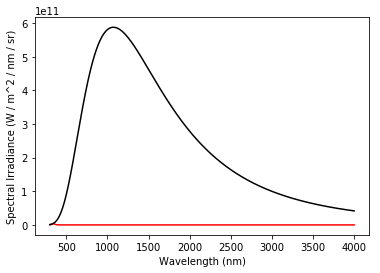

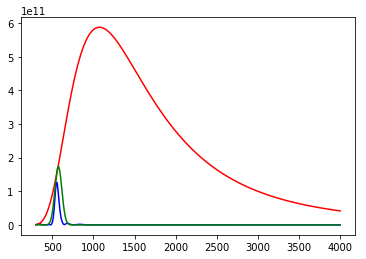

Luminous Efficiency Value is  79.90480862337171


In [2]:
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline


### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
d1 = 550e-9/(4*1.76)
d2 = 550e-9/(4*2.4)
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2','Al2O3', 'TiO2', 'Al2O3', 'TiO2','Air'], 
        'Thickness_List': [0, 10e-9, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,  0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }


### create instance of multilayer
lorentz_slab = multilayer(structure)
BB = datalib.BB(lorentz_slab.lambda_array, lorentz_slab.T_ml)
Ph = datalib.PhLum(lorentz_slab.lambda_array)
### define Lorentz parameters
c = 299792458
layer = 1
omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9

### create a layer in the multilayer structure defined
### by those Lorentz parameters
lorentz_slab.layer_lorentz(layer, omega_p, omega_0, gamma)
### Update optical properties with new material
lorentz_slab.fresnel()
### Update thermal emission properties with new material
lorentz_slab.thermal_emission()
### Update luminous efficiency with new material
lorentz_slab.luminous_efficiency()
### Plot emissivity and print efficiency!
plt.plot(lorentz_slab.lambda_array*1e9, lorentz_slab.thermal_emission_array, 'blue')
plt.plot(lorentz_slab.lambda_array*1e9, BB, 'red')
plt.plot(lorentz_slab.lambda_array*1e9, BB*Ph, 'green')


plt.show()
print("Luminous Efficiency Value is ",100*lorentz_slab.luminous_efficiency_val)


### Question 5:  How should you choose $\omega_0$ and $\gamma$ to match the photopic luminosity function?  Plot the emissivity of a Lorentz oscillator slab that you believe is ideally suited for the photopic luminosity function.

### Question 6: What is the luminous efficiency of this Lorentz slab?

### Question 7: What happens when you combine the Lorentz oscillator slab with your previously-chosen Bragg reflector?  In particular, how does the emissivity profile change and how does the luminous efficiency change?  

To answer, create a new instance of the multi-layer class that has the Lorentz slab as its top-most layer and then has a Bragg reflector using materials chosen from Question 3, plot its emissivity spectrum and compute its Luminous efficiency.  Experiment a bit with the number of Bragg reflector layers; for example, try two repeats of alternating $n_1$ and $n_2$, three repeats, four repeats.  Note how the number of repeats changes the luminous efficiency and the spectra.

One fundamental question is how best to change the various parameters of such a "critically-coupled" structure to improve its performance.  Analysis that might give insight takes inspiration from chemistry, where "normal modes" of a molecule are identified as the unique modes of motion, some of which are responsible for changing a molecule from one structure to another.  The normal modes for a molecule are obtained by first constructing the so-called Hessian matrix of the molecule (the second derivative of energy with respect to all possible changes in the atom positions), then identifying the eigenvalues and eigenvectors.  The eigenvectors represent the normal modes of motion and the eigenvalues represent their frequency (related to their energy).  Incidentally, IR spectroscopy probes the frequency/energy of such normal modes.

In our system, we can define the elements of the Hessian matrix as follows:
\begin{equation}
H_{ij} = \frac{\partial^2 \eta_{lum}}{\partial x_i \partial x_j},
\end{equation}
here $\eta_{lum}$ represents the luminous efficiency and $x_i$ and $x_j$ are 
different structural parameters that can be used to change the emissivity and the luminous efficiency 
of the structure.  For the critcally-coupled structures, these parameters include $\omega_P$, $\omega_0$, $\gamma$, $n_1$, $n_2$, $d_L$, $d_1$, and $d_2$; hence the Hessian is a 8x8 matrix!  In the following,
let's denote $x_1 = \omega_P, x_2 = \omega_0, x_3 = \gamma, x_4 = d_L, x_5 = n_1, x_6 = n_2, x_7 = d_1, x_8 = d_2$. 

The method of finite-differences can be used to compute the elements of the Hessian matrix.  For concreteness,
consider the element $H_{12}$:
\begin{equation}
\frac{\partial^2 \eta_{lum}(x_1, x_2, ..., x_8)}{\partial x_1 \partial x_2} = 
\frac{ \frac{\partial \eta_{lum}(x_1+h_1, x_2, ..., x_8) }{\partial x_2} - \frac{\partial \eta_{lum}(x_1 - h_1, x_2, ...,x_8)}{\partial x_2} }{2h_1},
\end{equation}
where
\begin{equation}
\frac{\partial \eta_{lum}(x_1+h_1, x_2, ..., x_8) }{\partial x_2} = 
\frac{\eta_{lum}(x_1, x_2+h_2, ..., x_8) - \eta_{lum}(x_1, x_2-h_2, ..., x_8) }{2h_2},
\end{equation}
and $h_1$ and $h_2$ are suitably small changes that can be made to the parameters $x_1$ and $x_2$, respectively.
The (somewhat cumbersome) function below computes the elements of the Hessian matrix for a system that includes
a Lorentz layer with thickness $d_L$ as the top-most layer, 2 periods of a Bragg-reflector with $n_1$, $d_1$ for the low-index layer and $n_2$, $d_2$ for the high-index layer:


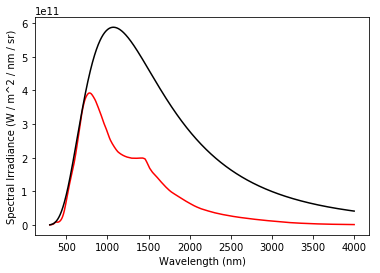

-0.029086500607117698
[105012.38215447 170939.19919631 139054.8036647   42782.56850621]
[-77535.01439272 162231.45520151  84723.36333429  80713.3958172 ]


In [23]:
### Re-define structure:
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10e-9, d1, d2, d1, d2, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9
### define instance called 'cc'
cc = multilayer(structure)

### a function to take an array of values x_1, ..., x_8 as defined above,
### re-define the multi-layer structure according to its values, and
### then update the luminous efficiency accordingly:
def update_multilayer(x):
    ### recall x_1 is omega_p, x_2 is omega_0, x_3 is gamma
    cc.layer_lorentz(1, omega_p, omega_0, gamma)
    ### x_4 is d_L, thickness of Lorentz layer
    ##cc.d[1] = x[2]
    ### x_5 is n_1, which applies to layers 2 and 4:
    ##cc.layer_static_ri(2, x[3])
    ##cc.layer_static_ri(4, x[3])
    ### x_6 is n_2, hich applies to layers 3 and 5:
    ##cc.layer_static_ri(3, x[4])
    ##cc.layer_static_ri(5, x[4])
    ### x_7 is d_1, which applies to layers 2 and 4
    cc.d[2] = x[0]
    cc.d[3] = x[1]
    ### x_8 is d_2, which applies to layers 3 and 5
    cc.d[4] = x[2]
    cc.d[5] = x[3]
    
    ### now we have the new structure, update fresnel quantities
    cc.fresnel()
    ### now we have new emissivity, update thermal emission
    cc.thermal_emission()
    
    ### now we have new thermal emission, update luminous efficiency
    cc.luminous_efficiency()

    ### return luminous efficiency
    return -cc.luminous_efficiency_val

def analytic_grad(x0):
    dim = len(x0)
    g = np.zeros(dim)
    cur = update_multilayer(x0)
    for i in range(0,dim):
        cc.fresnel_prime(i+2)
        cc.luminous_efficiency_prime()
        g[i] = cc.luminous_efficiency_prime_val
    return g
        
### array of parameters
x = np.zeros(4)
### define lorentz parameters
c = 299792458
layer = 1
omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7000e-9
omega_p = 2*np.pi*c/1000e-9

### Fill in x values
#x[0] = omega_p
#x[0] = omega_0
#x[1] = gamma
#x[2] = 10e-9
#x[3] = 1.76
#x[4] = 2.4
x[0] = 150e-9
x[1] = 110e-9
x[2] = 150e-9
x[3] = 110e-9

### create array of h values... 0.01*x should do it!
hi = 0.01*x
hj = 0.005*x
test = update_multilayer(x)
print(test)

def BuildGradient(x0):
    #h0 = 0.0001*x0
    dim = len(x0)
    h0 = 0.1e-9*np.ones(dim)
    g = np.zeros(dim)
    for i in range(0,dim):
        xpass = np.copy(x0)
        fx = x0[i] + h0[i]
        bx = x0[i] - h0[i]
        xpass[i] = fx
        efx = update_multilayer(xpass)
        xpass[i] = bx
        ebx = update_multilayer(xpass)
        
        run = 2*h0[i]
        g[i] = (efx-ebx)/run
    return g


def BuildHessian(x0, hi0, hj0):
    ### loop through elements i and j
    dim = len(x0)
    H = np.zeros((dim,dim))
    
    for i in range(0,dim):
        fxi = x0[i] + hi0[i]
        bxi = x0[i] - hi0[i]
        runi = 2*hi0[i]
        
        for j in range(0, dim):
            fxj = x0[j] + hj0[j]
            bxj = x0[j] - hj0[j]
            runj = 2*hj0[j]
            
            ### forward i forward j
            xpass = np.copy(x0)
            xpass[i] = fxi
            xpass[j] = fxj
            nff = update_multilayer(xpass)
            
            ### forward i backward j
            xpass[j] = bxj
            nfb = update_multilayer(xpass)
            
            ### backward i backward j
            xpass[i] = bxi
            nbb = update_multilayer(xpass)
            
            ### backward i forward j
            xpass[j] = fxj
            nbf = update_multilayer(xpass)
            
            gf = (nff - nfb)/runj
            gb = (nbf - nbb)/runj
            
            H[i][j] = (gf - gb)/runi
            
    return H

def SuperFunc(x):
    en = update_multilayer(x)
    gr = BuildGradient(x)
    return en, gr


g = BuildGradient(x)
ga = analytic_grad(x)
#SH = BuildHessian(x, hi, hj)

print(g)
print(ga)
    

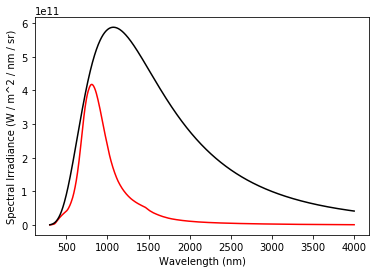

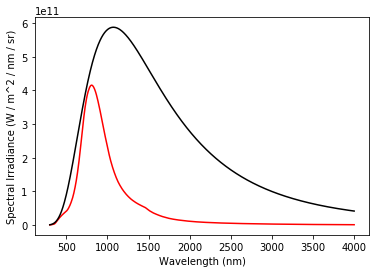

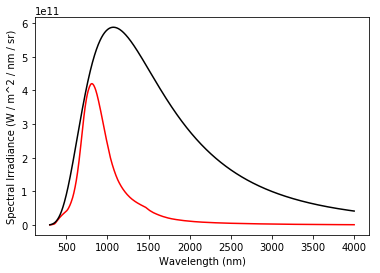

 efficiency on 4.227442214552727
 efficiency f 4.25855532637177
 efficiency b 4.196400125595963
 numeric grad is  3107760.0387903447
 analytic grad is  3107786.173414739


In [17]:
### Re-define structure:
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'Au', 'TiO2', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10e-9, 100e-9, 900e-9,  0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

sf =    {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'Au', 'TiO2', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10.1e-9, 100e-9, 900e-9,  0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }
sb =    {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'Au', 'TiO2', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 9.9e-9, 100e-9, 900e-9,  0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }



on = multilayer(structure)
f = multilayer(sf)
b = multilayer(sb)

print(" efficiency on", on.luminous_efficiency_val*100)
print(" efficiency f", f.luminous_efficiency_val*100)
print(" efficiency b", b.luminous_efficiency_val*100)
ef = f.luminous_efficiency_val
eb = b.luminous_efficiency_val
xf = 10.1e-9
xb = 9.9e-9
ng = (ef-eb)/(xf-xb)
print(" numeric grad is ",ng)
on.fresnel_prime(1)
on.luminous_efficiency_prime()
print(" analytic grad is ",on.luminous_efficiency_prime_val)


In [3]:
HI = np.linalg.inv(SH)
#print(E_opt)
up_x = np.dot(HI,g)

print(up_x)
E_opt, c_opt = np.linalg.eig(SH)
#print(E_opt)
#print(c_opt)
print("diff_1 is ",(x+up_x)/x)





[-0.00430444 -0.00336971]
diff_1 is  [0.97130376 0.96936628]


In [4]:
def print_fun(x, f, accepted):
    print("at minimum %.4f accepted %d" % (f, int(accepted)))
    
class MyBounds(object):
    def __init__(self, xmax=[1.0,1.0], xmin=[0.001,0.001] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

from scipy.optimize import minimize
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "BFGS", "jac": True}
mybounds = MyBounds()
xs = np.array([0.1, 0.1])
#res = minimize(update_multilayer, xs, method='nelder-mead', options={'xtol':1e-10, 'disp': True})
#res1 = minimize(update_multilayer, xs, method='BFGS', jac=BuildGradient, options={'disp': True})
res2 = basinhopping(SuperFunc, xs, minimizer_kwargs=minimizer_kwargs, niter=100, callback=print_fun, accept_test=mybounds)

#print("BFGS solution",res1.x)
#print("BFGS efficiency",update_multilayer(res1.x))
#print("BFGS gradient",BuildGradient(res1.x))

print("BH solution",res2.x)
print("BH efficiency",update_multilayer(res2.x))
print("BH gradient",BuildGradient(res2.x))


at minimum -0.7719 accepted 0
at minimum -0.6294 accepted 0
at minimum -0.7610 accepted 0
at minimum -0.6603 accepted 0
at minimum -0.7333 accepted 0
at minimum -0.6446 accepted 0
at minimum -0.8016 accepted 0
at minimum -0.6279 accepted 0
at minimum -0.6173 accepted 0
at minimum -0.6802 accepted 0
at minimum -0.7492 accepted 0
at minimum -0.7241 accepted 1
at minimum -0.7199 accepted 0
at minimum -0.6606 accepted 1
at minimum -0.6007 accepted 0
at minimum -0.6992 accepted 1
at minimum -0.6438 accepted 0
at minimum -0.7724 accepted 0
at minimum -0.6548 accepted 0
at minimum -0.6462 accepted 1
at minimum -0.6031 accepted 0
at minimum -0.5971 accepted 0
at minimum -0.7150 accepted 1
at minimum -0.6776 accepted 1
at minimum -0.7115 accepted 1
at minimum -0.6470 accepted 0
at minimum -0.6285 accepted 0
at minimum -0.6952 accepted 1
at minimum -0.7772 accepted 0
at minimum -0.6833 accepted 0
at minimum -0.7538 accepted 0
at minimum -0.6548 accepted 0
at minimum -0.6078 accepted 0
at minimum

In [5]:
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (res2.x[0], res2.x[1], res2.fun))
#print(res.x)
#print(update_multilayer(res.x))
#print(BuildGradient(res.x))
#g = BuildGradient(res.x)
#print(np.sqrt(g[0]**2 + g[1]**2))

global minimum: x = [0.4053, 0.0534], f(x0) = -0.7623
